# Chapter 5

### 5E1.
Which of the linear models below are multiple linear regressions?

(1) µi = α + βxi

(2) µi = $β_x$xi + $β_z$zi

(3) µi = α + β(xi − zi)

(4) µi = α + $β_x$xi + $β_z$zi

#### Answer 

2, 3, 4

### 5E2.
Write down a multiple regression to evaluate the claim: Animal diversity is linearly related to latitude, but only after controlling for plant diversity. You just need to write down the model definition.

#### Answer 
d ~ Normal(mu, sigma)

$\mu = a + b_l*l + b_pd *Pd$

### 5E3.
Write down a multiple regression to evaluate the claim: Neither amount of funding nor size of laboratory is by itself a good predictor of time to PhD degree; but together these variables are both positively associated with time to degree. Write down the model definition and indicate which side of zero each slope parameter should be on.

#### Answer 

$t = a+b_f*f + b_s*s$
where $b_f$ and $b_s$ is positive

### 5E4.
Suppose you have a single categorical predictor with 4 levels (unique values), labeled A, B, C
and D. Let Ai be an indicator variable that is 1 where case i is in category A. Also suppose Bi, Ci, and Di for the other categories. Now which of the following linear models are inferentially equivalent
ways to include the categorical variable in a regression? Models are inferentially equivalent when it’s possible to compute one posterior distribution from the posterior distribution of another model.

(1) µi = α + β_AAi + β_B Bi + β_D Di

(2) µi = α + $β_A$Ai + $β_B$Bi + $β_C$Ci + $β_D$Di

(3) µi = α + $β_B$Bi + $β_C$Ci + $β_D$Di

(4) µi = $α_A$Ai + $α_B$Bi + $α_C$Ci + $α_D$Di

(5) µi = $α_A$(1 − $B_i$ − $C_i$ − $D_i$) + $α_B$Bi + $α_C$Ci + $α_D$Di

#### Answer 

Only 2 is different, because it has an extra intercept

### 5M1.
Invent your own example of a spurious correlation. An outcome variable should be correlated with both predictor variables. But when both predictors are entered in the same model, the correlation between the outcome and one of the predictors should mostly vanish (or at least be greatly reduced).


In [1]:
# suppose y ~ normal(x, sigma), and we make a model of y ~ normal(mu, sigma), mu ~ ax+b*x_2 where x_2 is 2x

In [2]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




In [3]:
x <- rnorm(1e4, 5, 0.01)

In [4]:
x2 <- rnorm(1e4, 25, 0.01)

In [5]:
y <- rnorm(1e4, x, 0.02)

d <- data.frame(y, x, x2)

In [6]:
#now fit a model
m <- quap(
    alist(
        y ~ dnorm(mu, sigma),
        mu <- a+b*x+c*x2,
        a ~ dnorm(0,1),
        b ~ dnorm(1,2),
        c ~ dnorm(1,2),
        sigma ~ dexp(1)
        ), data = d
    )
        

In [7]:
precis(m)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.33719327,0.4603934345,-0.39860435,1.07299090
b,1.00161626,0.0205088265,0.96883920,1.03439333
c,-0.01380568,0.0181353297,-0.04278944,0.01517808
sigma,0.02028138,0.0001422684,0.02005401,0.02050875


Strong correlation with x and not so much with x2

### 5M2.
​
Invent your own example of a masked relationship. An outcome variable should be correlated with both predictor variables, but in opposite directions. And the two predictor variables should be correlated with one another.

In [53]:
N <- 100
x_real <- rnorm(N)
x_masked <- rnorm(N, 0.6*x_real)
y <- rnorm(N, x_real-x_masked)
d <- data.frame(y, x_real, x_masked)

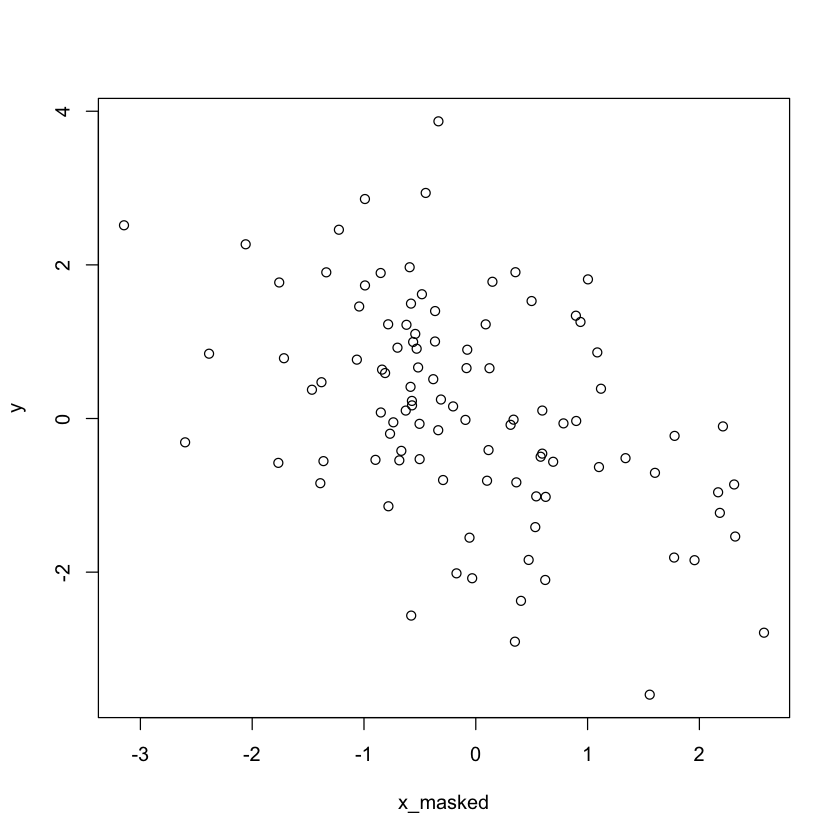

In [54]:
plot(x_masked, y)

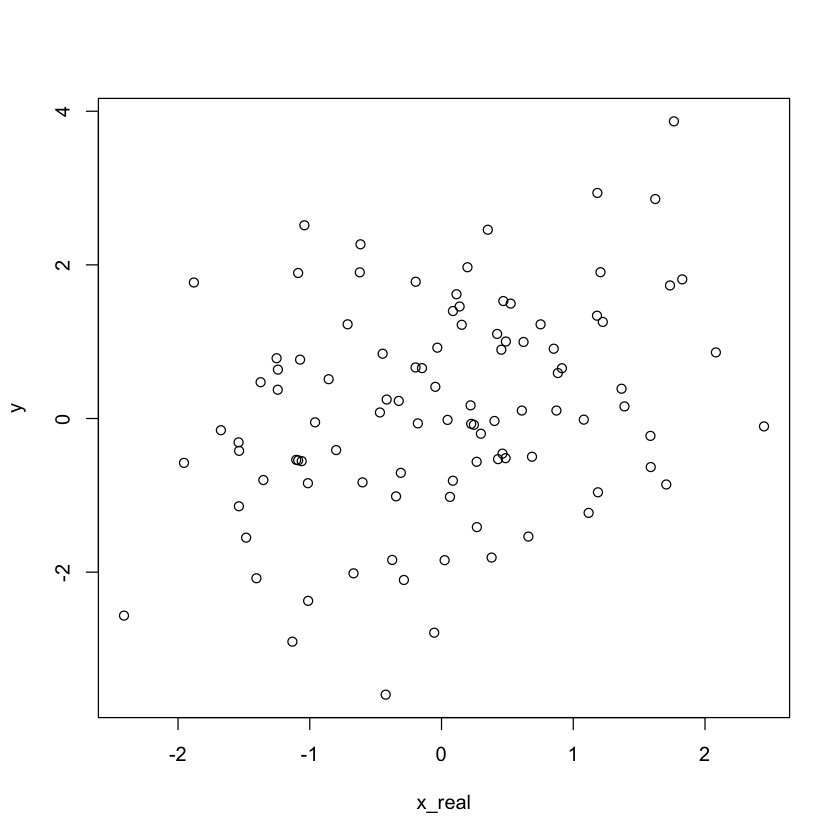

In [55]:
plot(x_real, y)

In [56]:
m <- quap(
    alist(
        y ~ dnorm(mu, sigma),
        mu <- a+b*x_real+c*x_masked,
        a ~ dnorm(0, 2),
        b ~ dnorm(0, 2),
        c ~ dnorm(-1, 4),
        sigma ~ dexp(1)
        ), data = d)

In [57]:
precis(m)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.03606934,0.08564806,-0.1008128,0.1729515
b,1.00329230,0.09810164,0.8465069,1.1600777
c,-1.04426549,0.08967035,-1.1875760,-0.9009549
sigma,0.85360681,0.05997900,0.7577488,0.9494648


In this we saw strong correlations for both variables (i.e. parameter is high), try just one

In [58]:
m_b <- quap(
    alist(
        y ~ dnorm(mu, sigma),
        mu <- a+b*x_real,
        a ~ dnorm(0, 2),
        b ~ dnorm(0, 2),
        sigma ~ dexp(1)
        ), data = d)

In [59]:
precis(m_b)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.1277335,0.13017710,-0.08031463,0.3357817
b,0.4092781,0.12798985,0.20472559,0.6138306
sigma,1.3045360,0.09135518,1.15853276,1.4505392


this one is weak

In [60]:
m_c <- quap(
    alist(
        y ~ dnorm(mu, sigma),
        mu <- a+c*x_masked,
        a ~ dnorm(0, 2),
        c ~ dnorm(-1, 4),
        sigma ~ dexp(1)
        ), data = d)

In [61]:
precis(m_c)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.07686709,0.12184410,-0.1178633,0.2715975
c,-0.56833427,0.10923152,-0.7429073,-0.3937612
sigma,1.21683122,0.08526806,1.0805564,1.3531060


This is also weak

multivariate regression made the parameters stronger, as it should for masked relationships. Especially the fact that masked and real x have opposite relation

### 5M3.

It is sometimes observed that the best predictor of fire risk is the presence of firefighters — States and localities with many firefighters also have more fires. Presumably firefighters do not cause
fires. Nevertheless, this is not a spurious correlation. Instead fires cause firefighters. Consider the same reversal of causal inference in the context of the divorce and marriage data. How might a high divorce rate cause a higher marriage rate? Can you think of a way to evaluate this relationship, using multiple regression?


**Answer**

High divorce rate can cause marriage rate to rise by higher remarraige rate. We can check this by doing multiple regression on divorce rate and remarraige rate, if there are masked relationship, if we have 

D -> R -> M

This would be a direct relationship. In this case the parameter on D should be small and mostly rest of R. 

### 5M4.

In the divorce data, States with high numbers of members of the Church of Jesus Christ of Latter-day Saints (LDS) have much lower divorce rates than the regression models expected. Find a list of LDS population by State and use those numbers as a predictor variable, predicting divorce rate using marriage rate, median age at marriage, and percent LDS population (possibly standardized). You may want to consider transformations of the raw percent LDS variable.

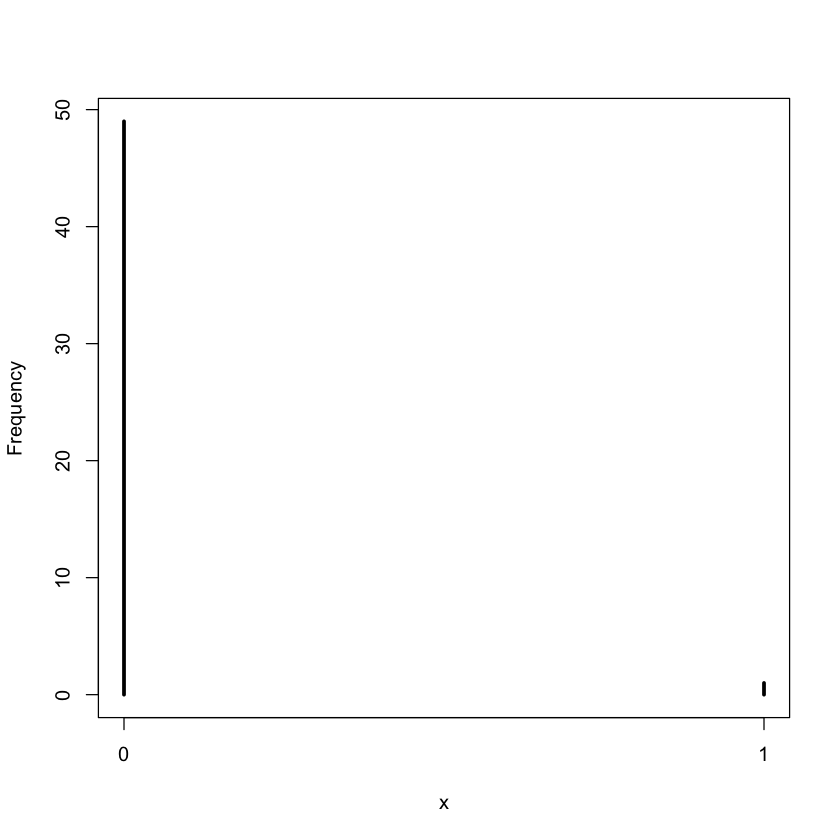

In [112]:
#taken from Jeffery Girard's blog

data(WaffleDivorce)
d <- WaffleDivorce
d$LDS <- c(0.0077, 0.0453, 0.0610, 0.0104, 0.0194, 0.0270, 0.0044, 0.0057, 0.0041, 0.0075, 0.0082, 0.0520, 0.2623, 0.0045, 0.0067, 0.0090, 0.0130, 0.0079, 0.0064, 0.0082, 0.0072, 0.0040, 0.0045, 0.0059, 0.0073, 0.0116, 0.0480, 0.0130, 0.0065, 0.0037, 0.0333, 0.0041, 0.0084, 0.0149, 0.0053, 0.0122, 0.0372, 0.0040, 0.0039, 0.0081, 0.0122, 0.0076, 0.0125, 0.6739, 0.0074, 0.0113, 0.0390, 0.0093, 0.0046, 0.1161)
d$logLDS <- log(d$LDS)
d$logLDS.s <- (d$logLDS - mean(d$logLDS)) / sd(d$logLDS)
simplehist(d$LDS)

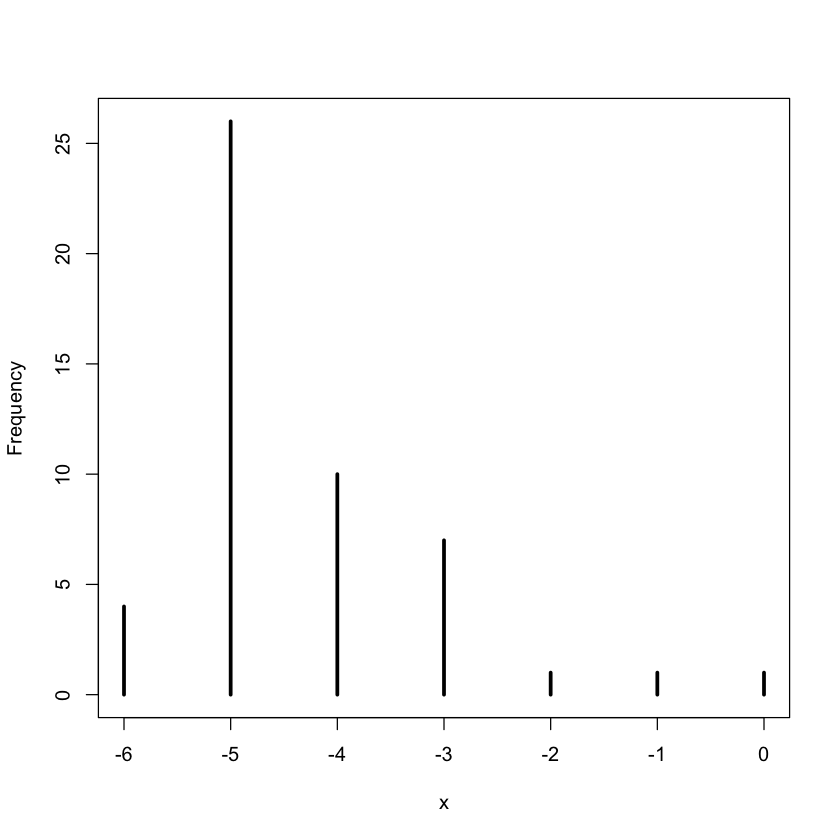

In [113]:
# log transformed distribution
simplehist(d$logLDS)

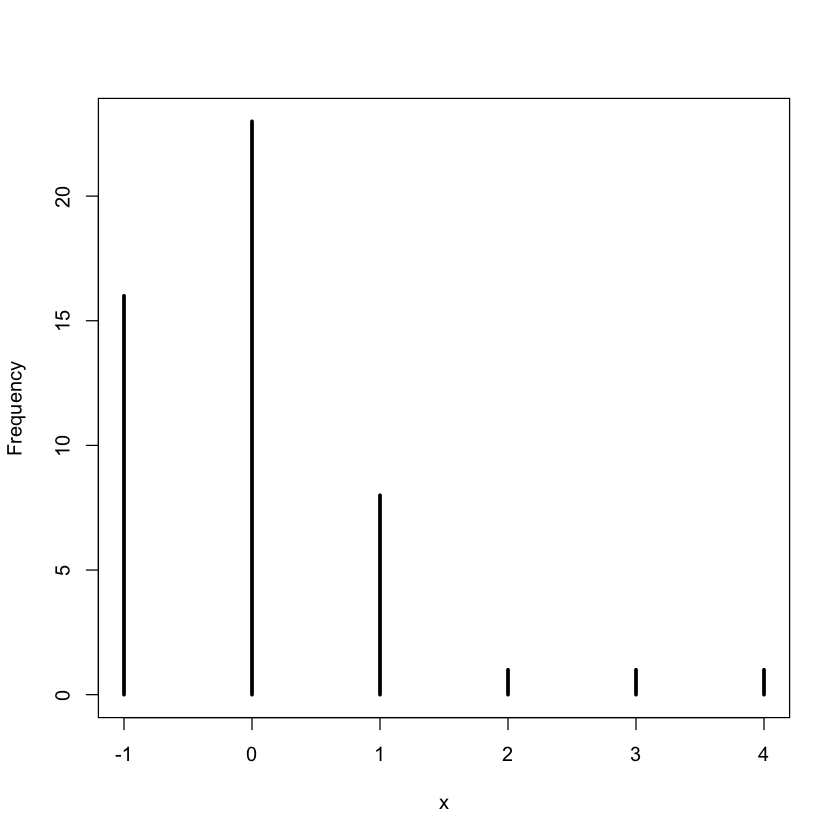

In [114]:
simplehist(d$logLDS.s)

has better distribution, now start modeling

In [119]:
m <- quap(
    alist(
        Divorce ~ dnorm(mu, sigma),
        mu <- a0 + a1*logLDS.s+a2*MedianAgeMarriage+a3*Marriage,
        a1 ~ dnorm(0, 10),
        a2 ~ dnorm(0, 10),
        a3 ~ dnorm(0, 10), 
        a0 ~ dnorm(10, 20),
        sigma ~ dexp(1)
        ), data = d
    )

In [121]:
precis(m)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a1,-0.60852267,0.28666084,-1.06666206,-0.1503833
a2,-1.03191104,0.22194801,-1.38662683,-0.6771952
a3,0.05285085,0.08154904,-0.07748027,0.1831820
a0,35.50777296,6.69291191,24.81120706,46.2043389
sigma,1.36013626,0.13378115,1.14632814,1.5739444


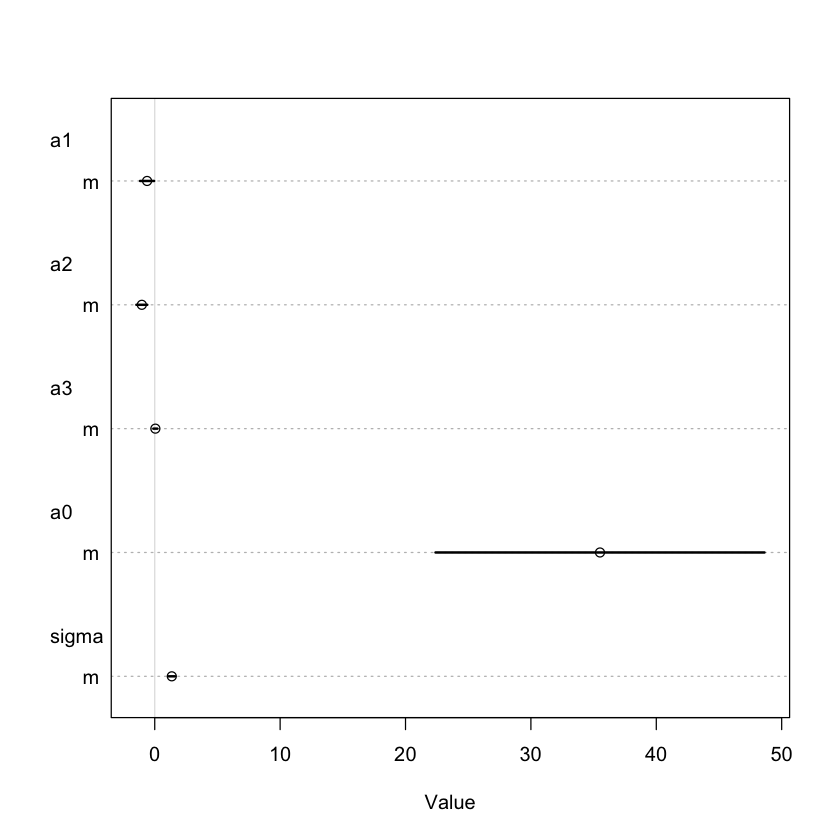

In [123]:
# lets plot them

plot(coeftab(m))

a1, a2, a0 are not including zero, so larger proportion of mormons or larger median age leads to a lower divroce rate

### 5M5.
One way to reason through multiple causation hypotheses is to imagine detailed mechanisms through which predictor variables may influence outcomes. For example, it is sometimes argued that the price of gasoline (predictor variable) is positively associated with lower obesity rates (outcome
variable). However, there are at least two important mechanisms by which the price of gas could reduce obesity. First, it could lead to less driving and therefore more exercise. Second, it could lead to less driving, which leads to less eating out, which leads to less consumption of huge restaurant meals.
Can you outline one or more multiple regressions that address these two mechanisms? Assume you can have any predictor data you need.

There are two pathways

GasPrice -> LessDriving -> More Exercise -> Lower Obesity

GasPrice -> LessDriving -> Less Eating out -> LessConsumptionofMeals -> Lower Obesity

So we want to figure out which one of the path is correct. If we can control for the exercise amount and the consumption of meals, we can directly regress obesity on these two parameters, and provide the relationship. We can then move backwards and regress consumption of meals with eating out, move further upwards

### 5H1.
In the divorce example, suppose the DAG is: M → A → D. What are the implied conditional independencies of the graph? Are the data consistent with it?

#### Answer 
 Given A, D is independent of M. That is because M's impact on D is mediated through A in this model, and holding A constant should mean M has no impact on D.


In [145]:
data(WaffleDivorce)
d <- WaffleDivorce

In [146]:
d$D <- standardize(d$Divorce)
d$M <- standardize(d$Marriage)
d$A <- standardize(d$MedianAgeMarriage)

In [147]:
m <- quap(
    alist(
        D ~ dnorm(mu, sigma),
        mu <- a + bA*A + bM * M, 
        a ~ dnorm(0, 0.2),
        bA ~ dnorm(0, 0.5),
        bM ~ dnorm(0, 0.5),
        sigma ~ dexp(1),
        A ~ dnorm(mu_A, sigma_A),
        mu_A <- aA + bAA*M,
        aA ~ dnorm(0, 0.2),
        bAA ~ dnorm(0, 0.5),
        sigma_A ~ dexp(1)
    ), data = d
           )

In [156]:
M_seq <- seq(from=-2, to = 2, length.out = 30)

In [161]:
sim_dat <- data.frame(M = M_seq, A = 0)
s <- sim(m, data = sim_dat, vars = c( 'D'))

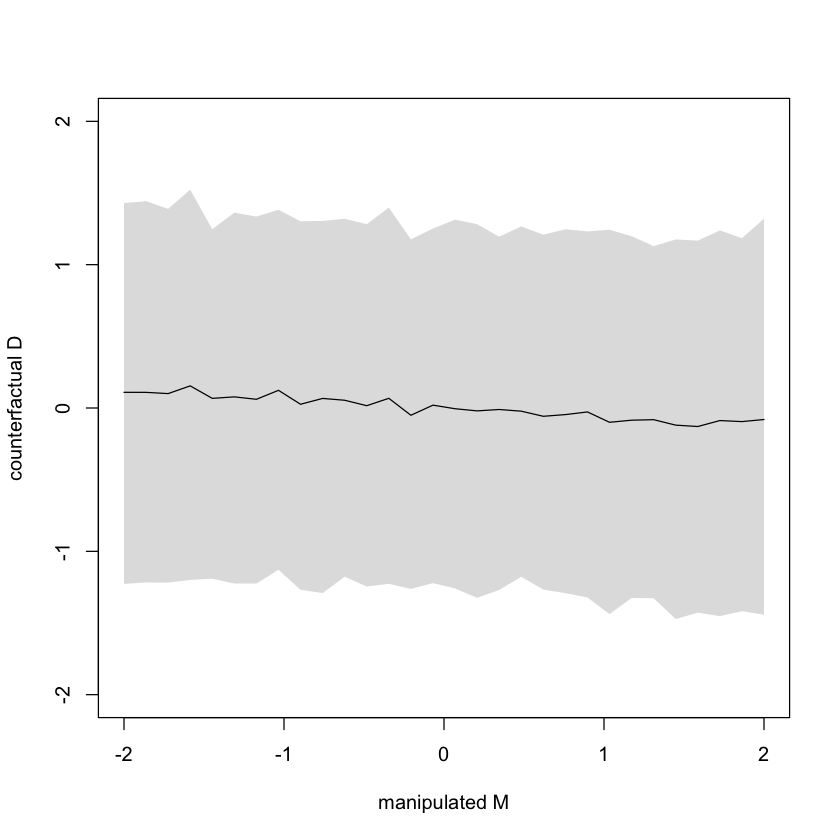

In [164]:
plot(sim_dat$M, colMeans(s), ylim = c(-2, 2), type = 'l', xlab= 'manipulated M', ylab = 'counterfactual D')
shade(apply(s, 2, PI), sim_dat$M)

when A = 0, we have no effect

### 5H2.
Assuming that the DAG for the divorce example is indeed M → A → D, fit a new model and use it to estimate the counterfactual effect of halving a State’s marriage rate M. Use the counterfactual example from the chapter (starting on page 140) as a template.

In [165]:
sim_dat <- data.frame(M=M_seq)

#simulate A and D, using M_seq
s<-sim(m, dat = sim_dat, vars = c("A", "D"))

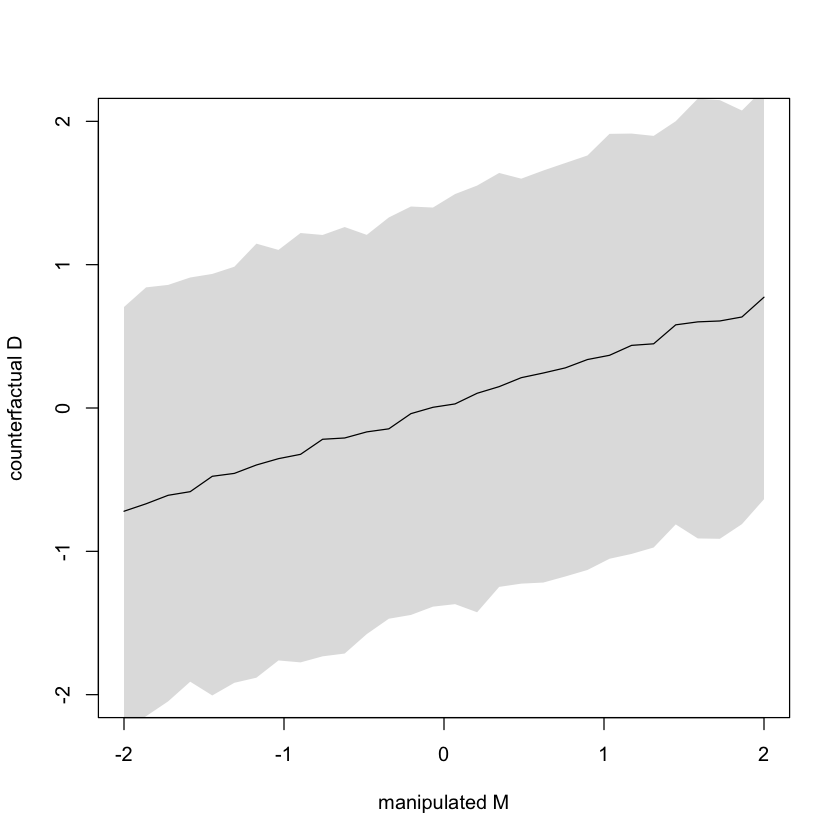

In [166]:
plot(sim_dat$M, colMeans(s$D), ylim = c(-2, 2), type = 'l', xlab= 'manipulated M', ylab = 'counterfactual D')
shade(apply(s$D, 2, PI), sim_dat$M)

halving M will decrease the divorce rate by 1/2 (standardized), let's get a precise number

In [168]:
mean(d$Marriage)

[1] 20.114

In [171]:
mean(d$Marriage.SE)

[1] 1.3994

In [172]:
sim2_dat <-data.frame(M=(c(15, 30) - 20.114)/1.3994)

In [174]:
s2 <- sim(m, data = sim2_dat, vars = c("A", "D"))

In [175]:
mean(s2$D[,2]-s2$D[,1])

[1] 3.921514

divorce rate will change by a lot